# Analysing Goodreads Dataframe

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the dataset which we have scrapped
total_quotes = pd.read_csv('../output/total_quotes')

In [3]:
total_quotes

,quote,author,tags
0,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"['attributed-no-source', 'best', 'life', 'love..."
1,“You've gotta dance like there's nobody watchi...,William W. Purkey,"['dance', 'heaven', 'hurt', 'inspirational', '..."
2,“You know you're in love when you can't fall a...,Dr. Seuss,"['attributed-no-source', 'dreams', 'love', 're..."
3,“A friend is someone who knows all about you a...,Elbert Hubbard,"['friend', 'friendship', 'knowledge', 'love']"
4,“Darkness cannot drive out darkness: only ligh...,"Martin Luther King Jr.,","['darkness', 'drive-out', 'hate', 'inspiration..."
...,...,...,...
1795,"“Suppose neutral angels were able to talk, Yah...",Tom Robbins,"['god', 'satan']"
1796,“Once upon a time there was a young prince who...,John Fowles,"['belief', 'death', 'god', 'life', 'magic', 'p..."
1797,“I think you have every right to cherry-pick w...,"Elizabeth Gilbert,","['cherry-pick', 'god', 'religion']"
1798,“Someday I will understand Auschwitz. This was...,"William Styron,","['auschwitz', 'evil', 'god', 'humanity', 'man'..."


First Let's fix tags attribute which is not well defined
what we can do is , we can remove both opening tag and closing tag in them

In [4]:
total_quotes.dtypes

quote     object
author    object
tags      object
dtype: object

In [5]:
# this function will apply on tags and it will remove list tag in them
def clean_tags(tag):
    tag = tag[1:-1]
    return tag

In [6]:
total_quotes['tags'] = total_quotes['tags'].apply(clean_tags)

In [7]:
total_quotes

,quote,author,tags
0,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"'attributed-no-source', 'best', 'life', 'love'..."
1,“You've gotta dance like there's nobody watchi...,William W. Purkey,"'dance', 'heaven', 'hurt', 'inspirational', 'l..."
2,“You know you're in love when you can't fall a...,Dr. Seuss,"'attributed-no-source', 'dreams', 'love', 'rea..."
3,“A friend is someone who knows all about you a...,Elbert Hubbard,"'friend', 'friendship', 'knowledge', 'love'"
4,“Darkness cannot drive out darkness: only ligh...,"Martin Luther King Jr.,","'darkness', 'drive-out', 'hate', 'inspirationa..."
...,...,...,...
1795,"“Suppose neutral angels were able to talk, Yah...",Tom Robbins,"'god', 'satan'"
1796,“Once upon a time there was a young prince who...,John Fowles,"'belief', 'death', 'god', 'life', 'magic', 'ph..."
1797,“I think you have every right to cherry-pick w...,"Elizabeth Gilbert,","'cherry-pick', 'god', 'religion'"
1798,“Someday I will understand Auschwitz. This was...,"William Styron,","'auschwitz', 'evil', 'god', 'humanity', 'man',..."


In [8]:
total_quotes['quote'] = total_quotes['quote'].apply(clean_tags)

Removing double quotes in tag columns

In [9]:
total_quotes

,quote,author,tags
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"'attributed-no-source', 'best', 'life', 'love'..."
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"'dance', 'heaven', 'hurt', 'inspirational', 'l..."
2,You know you're in love when you can't fall as...,Dr. Seuss,"'attributed-no-source', 'dreams', 'love', 'rea..."
3,A friend is someone who knows all about you an...,Elbert Hubbard,"'friend', 'friendship', 'knowledge', 'love'"
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr.,","'darkness', 'drive-out', 'hate', 'inspirationa..."
...,...,...,...
1795,"Suppose neutral angels were able to talk, Yahw...",Tom Robbins,"'god', 'satan'"
1796,Once upon a time there was a young prince who ...,John Fowles,"'belief', 'death', 'god', 'life', 'magic', 'ph..."
1797,I think you have every right to cherry-pick wh...,"Elizabeth Gilbert,","'cherry-pick', 'god', 'religion'"
1798,Someday I will understand Auschwitz. This was ...,"William Styron,","'auschwitz', 'evil', 'god', 'humanity', 'man',..."


Let's also check for if we can make column for each tags having values yes or no.
This can be posibble if there are less number of different tags like less than 10.
if different number of tags is less than 10 then we will make column for those tags having values yes/no or 1/0.

In [10]:
tags_series = total_quotes['tags']
total_different_tags = []
for tags in tags_series:
    for tag in tags.split(", "):
        tag_text = tag[1:-1]
        print(tag_text)
        if tag_text not in total_different_tags:
            print(tag)
            total_different_tags.append(tag_text)

attributed-no-source
'attributed-no-source'
best
'best'
life
'life'
love
'love'
mistakes
'mistakes'
out-of-control
'out-of-control'
truth
'truth'
worst
'worst'
dance
'dance'
heaven
'heaven'
hurt
'hurt'
inspirational
'inspirational'
life
love
sing
'sing'
attributed-no-source
dreams
'dreams'
love
reality
'reality'
sleep
'sleep'
friend
'friend'
friendship
'friendship'
knowledge
'knowledge'
love
darkness
'darkness'
drive-out
'drive-out'
hate
'hate'
inspirational
light
'light'
love
peace
'peace'
inspirational
love
life
love
love
love
activism
'activism'
apathy
'apathy'
hate
indifference
'indifference'
inspirational
love
opposite
'opposite'
philosophy
'philosophy'
friendship
lack-of-friendship
'lack-of-friendship'
lack-of-love
'lack-of-love'
love
marriage
'marriage'
unhappy-marriage
'unhappy-marriage'
love
poetry
'poetry'
do-wrong
'do-wrong'
love
trust
'trust'
wrong
'wrong'
love
courage
'courage'
deeply-loved
'deeply-loved'
love
strength
'strength'
widely-misattributed
'widely-misattributed'

inspiration
inspirational
inspirational-quotes
inspire
inspiring
life
life-quotes
living
optimism
optimistic
positive
positive-affirmation
positive-life
positive-thinking
regret
time
worry
extraterrestrials
'extraterrestrials'
humor
intelligent-life
'intelligent-life'
life
science
universe
life
love
music
simile
song
achievement
'achievement'
believe-in-yourself
'believe-in-yourself'
brave
courage
inspiration
inspirational
inspirational-attitude
inspirational-life
inspirational-quotes
inspire
inspiring
life
life-and-living
life-lessons
life-quotes
living
motivation
motivational
optimism
optimistic
positive
positive-affirmation
positive-life
positive-thinking
talent
'talent'
destiny
happiness
history
inspirational
let-go
'let-go'
letting-go
life
motivational
moving-on
success
brain
'brain'
life
mind
life
happiness
life
books
life
be-yourself
'be-yourself'
be-yourself-inspirational
'be-yourself-inspirational'
be-yourself-quote
'be-yourself-quote'
be-yourself-quotes
'be-yourself-quotes'
h

move-on
optimism
optimistic
positive
positive-affirmation
positive-life
positive-thinking
change
growth
inspirational
inspirational-attitude
inspirational-life
inspirational-quotes
life-and-living
life-lessons
death
inspirational
voice
'voice'
belief
direction
faith
flight
flying
flying-spirit
hope
inspirational
inspirational-life
inspirational-quotes
life
life-and-living
living
trust
uplifting
winds
winds-of-life
wings
benediction
'benediction'
evil
goodwill
'goodwill'
humor
inspirational
wishes
'wishes'
friendship
happiness
humor
inspirational
jealousy
success
awesome
'awesome'
friendship
inspirational
appreciate
change
happiness
inspiration
inspirational
inspirational-attitude
inspirational-life
inspirational-quotes
inspire
inspiring
laugh
life
life-and-living
life-lessons
life-quotes
living
love
optimism
optimistic
positive
positive-affirmation
positive-life
positive-thinking
relationship
respect
smile
value
inspirational
inspiration
inspirational
inspirational-quotes
kind
kindness

'psychoanalysis'
psychology
inspirational
pain
philosophy
philosophy
philosophy
politics
feynman
'feynman'
knowledge
mystery
philosophy
science
understanding
einstein
philosophy
science
ethics
logic
metaphysics
ontology
'ontology'
philosophy
psychology
science
atheism
belief
blind
'blind'
blind-faith
'blind-faith'
blindness
'blindness'
christian-faith
'christian-faith'
christian-miracle
'christian-miracle'
critical-thinking
'critical-thinking'
critical-thought
'critical-thought'
death-of-reason
'death-of-reason'
doubt
'doubt'
doubt-is-sin
'doubt-is-sin'
eternity
existence
foundation-of-belief
'foundation-of-belief'
human-nature
intoxication
'intoxication'
meaning
meaning-of-life
metaphor
miracle
myth
nature
origin
'origin'
philosophy
purpose
purpose-of-life
reason
reflection
religious-faith
'religious-faith'
resurrection
'resurrection'
resurrection-of-jesus
'resurrection-of-jesus'
sin
sinful
'sinful'
thinking
thoughts
wasted-life
'wasted-life'
attention
compassion
happiness
happy-life


'fill-the-void'
god
heart-broken
'heart-broken'
horrific
'horrific'
motivational
repercussions
'repercussions'
suffering
true-love
unconditional-love
'unconditional-love'
unrequited-love
'unrequited-love'
void
'void'
god
inspirational
soul
allah
god
pray
worship
god
future
god
love
contemplation
'contemplation'
god
loneliness
meditation
solitude
god
god
love
awakening
beautiful
beauty
blind
closing-ears
'closing-ears'
closing-eyes
'closing-eyes'
conformityredemption
'conformityredemption'
creator
'creator'
explore
'explore'
eyes
facades
'facades'
fake
'fake'
fruit
'fruit'
fruitful-garden
'fruitful-garden'
fruits
'fruits'
garden
'garden'
god
god-s-garden
'god-s-garden'
grateful
'grateful'
gratitude
illumination
'illumination'
illusion
'illusion'
illusions
journey
life
life-path
'life-path'
light
looking
'looking'
miracle
miracles
mirage
'mirage'
nature
orchardgracious
'orchardgracious'
path
'path'
prayer
quest
real
'real'
ripe
'ripe'
search
'search'
searching-truth
'searching-truth'
see

In [11]:
#checking for how many different tags are there

In [12]:
len(total_different_tags)

1606

As we can see there are 1606 different tags so we can't just create columns for this .

# Missing Values

Let's check for null values or missing values in dataframe

In [13]:
total_quotes.isnull().sum()

quote     0
author    0
tags      0
dtype: int64

In [14]:
#There are no missing values in dataframe

In [15]:
#let's visualize it on heatmap

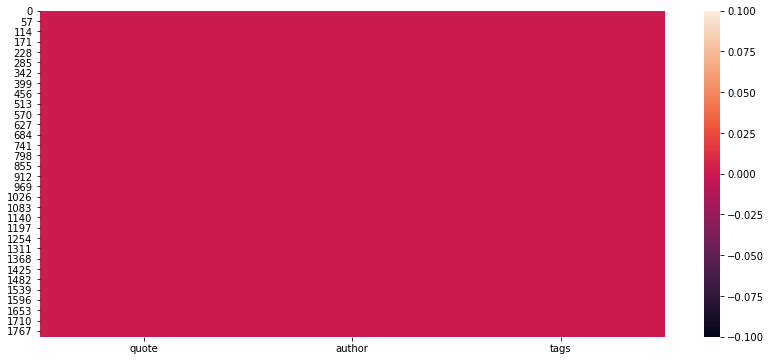

In [20]:
plt.figure(figsize=(14,6))
sns.heatmap(total_quotes.isnull())

No missing Values